## Trabalhando com planilhas Excel

In [1]:
import pandas as pd

In [2]:
df1 = pd.read_excel('/content/drive/MyDrive/Datasets/Aracaju.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/Datasets/Fortaleza.xlsx')
df3 = pd.read_excel('/content/drive/MyDrive/Datasets/Natal.xlsx')
df4 = pd.read_excel('/content/drive/MyDrive/Datasets/Recife.xlsx')
df5 = pd.read_excel('/content/drive/MyDrive/Datasets/Salvador.xlsx')

In [3]:
# concatenando os datasets
df = pd.concat([df1, df2, df3, df4, df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
# Verificando vendas de cada cidade
df.groupby('Cidade')['Vendas'].sum()

Cidade
Aracaju       9472.98
Fortaleza    10120.71
Natal        59187.76
Recife       11119.10
Salvador     19714.40
Name: Vendas, dtype: float64

In [6]:
# Pegando uma amostra
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
13,Salvador,2019-02-12,39.29,1035,1
107,Natal,2019-01-02,14.70,1035,1
6,Aracaju,2018-01-01,35.50,1522,2
128,Aracaju,2018-01-01,37.49,1521,2
62,Fortaleza,2019-01-01,106.21,1005,6


In [7]:
# Verificando os tipos
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
# Alterando o tipo de uma coluna
df['LojaID'] = df['LojaID'].astype('object')
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [10]:
# Verificando nulos
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
# substituindo valores null (se tivesse) pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [12]:
# apagando linhas com NaN
df.dropna(axis=0, inplace=True)

In [13]:
# apagando baseado apenas em uma coluna
df.dropna(subset=['Vendas'], inplace=True)

In [14]:
# apagando somente as linhas com todos em branco
df.dropna(how='all', inplace=True)

In [15]:
# criando colunas
df['Receita'] = df['Vendas'].mul(df['Qtde'])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [16]:
# Maior receita
df.Receita.max()

3544.0

In [17]:
#Menor receita
df.Receita.min()

3.34

In [18]:
# maiores
df.nlargest(3, ['Receita'])

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [19]:
# menores
df.nsmallest(3, ['Receita'])

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [21]:
# Agrupando por cidade
df.groupby('Cidade')['Receita'].sum().sort_values(ascending = False)

Cidade
Natal        167227.52
Recife        51936.51
Aracaju       48748.25
Salvador      40596.73
Fortaleza     37913.97
Name: Receita, dtype: float64

In [22]:
# outra opcao ao nlargest
df.sort_values(by=['Receita'], ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com datas

In [23]:
# Altera coluna para int64
df['Data'] = df['Data'].astype('int64')
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [24]:
# altera coluna para tipo datetime64
df['Data'] = pd.to_datetime(df['Data'])
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [25]:
# agrupando por ano
df.groupby(by = df['Data'].dt.year).sum()

,Vendas,Qtde,Receita
Data,,,
2018,31456.67,775,118176.53
2019,78158.28,2141,228246.45


In [26]:
# Criando coluna com ano
df['Ano'] = df['Data'].dt.year
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano
67,Salvador,2019-01-01,36.89,1037,2,73.78,2019
125,Fortaleza,2019-03-02,37.60,983,4,150.40,2019
149,Salvador,2019-01-02,22.38,1034,3,67.14,2019
129,Natal,2019-01-02,125.66,1037,1,125.66,2019
74,Fortaleza,2019-01-01,163.09,1005,5,815.45,2019


In [27]:
# Criando coluna com mês
df['Mes'], df['Dia'] = df['Data'].dt.month, df['Data'].dt.day
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mes,Dia
176,Salvador,2019-01-02,19.42,1035,3,58.26,2019,1,2
120,Fortaleza,2019-03-02,184.90,982,4,739.60,2019,3,2
108,Recife,2019-03-02,152.89,981,4,611.56,2019,3,2
217,Natal,2019-01-02,37.65,1036,2,75.30,2019,1,2
27,Recife,2019-01-01,22.25,980,7,155.75,2019,1,1


In [28]:
# Data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [29]:
# Data mais recente
df['Data'].max()

Timestamp('2019-04-05 00:00:00')

In [30]:
# Calculando diferenca entre dtas
df['diferenca_dias'] = df['Data'] - df['Data'].min()
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mes,Dia,diferenca_dias
59,Aracaju,2018-01-01,15.07,1523,7,105.49,2018,1,1,0 days
1,Natal,2018-11-25,563.00,853,2,1126.00,2018,11,25,328 days
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,2019,1,1,365 days
25,Salvador,2019-01-01,220.62,1035,1,220.62,2019,1,1,365 days
14,Natal,2018-06-03,660.00,853,3,1980.00,2018,6,3,153 days


In [31]:
df.dtypes

Cidade                     object
Data               datetime64[ns]
Vendas                    float64
LojaID                     object
Qtde                        int64
Receita                   float64
Ano                         int64
Mes                         int64
Dia                         int64
diferenca_dias    timedelta64[ns]
dtype: object

In [32]:
# criando coluna com trimestre
df['Trimestre'] = df.Data.dt.quarter
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mes,Dia,diferenca_dias,Trimestre
11,Recife,2019-01-01,202.79,980,5,1013.95,2019,1,1,365 days,1
21,Natal,2019-02-08,679.00,853,2,1358.00,2019,2,8,403 days,1
83,Salvador,2019-01-01,63.66,1036,2,127.32,2019,1,1,365 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,2019,3,2,425 days,1
224,Natal,2019-01-02,178.30,1035,3,534.90,2019,1,2,366 days,1


In [48]:
# Filtrando a amostra
vendas_marco_2019 = df.loc[(df.Ano == 2019) & (df.Mes == 3)]
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano,Mes,Dia,diferenca_dias,Trimestre
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
141,Recife,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
125,Salvador,2019-03-02,25.00,1037,2,50.00,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
75,Natal,2019-03-30,706.00,854,2,1412.00,2019,3,30,453 days,1
19,Natal,2019-03-31,282.00,854,2,564.00,2019,3,31,454 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1
66,Natal,2019-03-24,559.00,853,2,1118.00,2019,3,24,447 days,1
116,Salvador,2019-03-02,41.78,1034,3,125.34,2019,3,2,425 days,1
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019,3,2,425 days,1


In [39]:
df.Mes.unique()

array([ 1,  2,  3,  8, 11,  7,  5, 10,  9,  6,  4, 12])

## Visualizando os dados

In [49]:
# contagem de valores
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

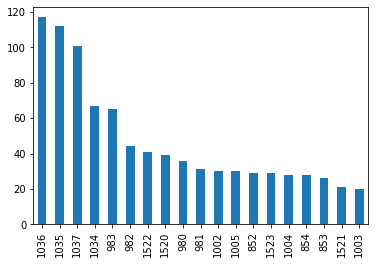

In [50]:
# gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

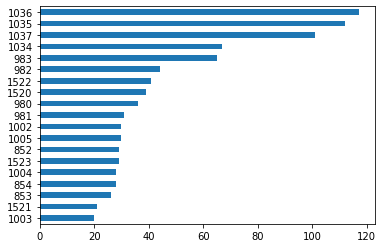

In [53]:
# gráfico de barras horizontais (; no final inibe impressão do objeto do plot)
df['LojaID'].value_counts(ascending=True).plot.barh();

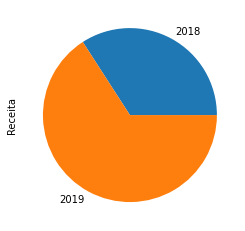

In [55]:
# Gráfico de pizza
df.groupby(by = df['Data'].dt.year)['Receita'].sum().plot.pie();

In [56]:
# total de vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

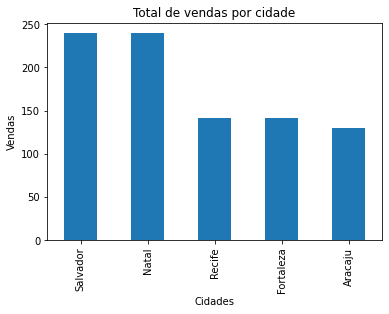

In [59]:
# Adicionando titulo e nome nos eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title = "Total de vendas por cidade")
plt.xlabel('Cidades')
plt.ylabel('Vendas');

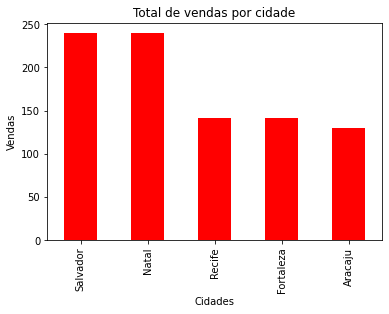

In [60]:
df['Cidade'].value_counts().plot.bar(title = "Total de vendas por cidade", color='red')
plt.xlabel('Cidades')
plt.ylabel('Vendas');

In [61]:
#alterando o estilo
plt.style.use('ggplot')

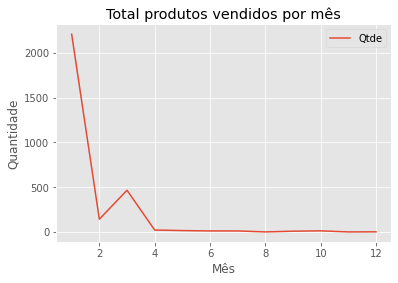

In [65]:
df.groupby(df['Mes'])['Qtde'].sum().plot(title="Total produtos vendidos por mês")
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.legend();

In [66]:
# Separando vendas de 2019
df_2019 = df[df['Ano'] == 2019]

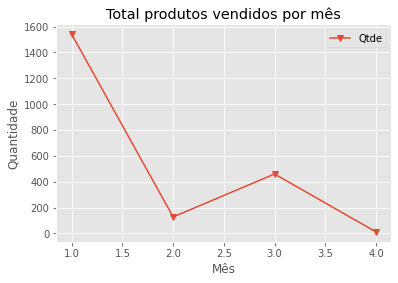

In [68]:
# total produtos vendidos por mes em 2019
df_2019.groupby(df_2019['Mes'])['Qtde'].sum().plot(title="Total produtos vendidos por mês", marker='v')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.legend();

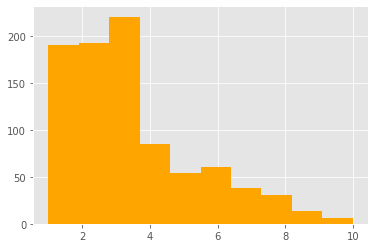

In [73]:
# Histograma
plt.hist(df['Qtde'], color='orange');

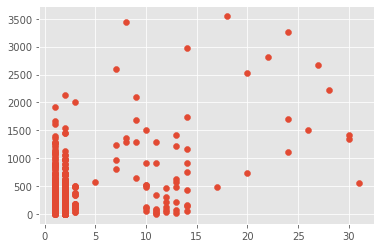

In [74]:
# scatter plot
plt.scatter(x=df_2019['Dia'], y=df_2019['Receita']);

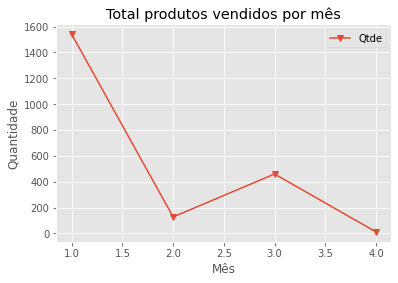

In [75]:
# salvando como png
df_2019.groupby(df_2019['Mes'])['Qtde'].sum().plot(title="Total produtos vendidos por mês", marker='v')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.legend();
plt.savefig('Gráfico QTDE x MES.png')